# GroupBy

In [2]:
import pandas as pd

# create a dataframe of car models by two companies
df = pd.DataFrame({
    'Company': ['A', 'A', 'A', 'B', 'B', 'B', 'B'],
    'Model': ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'B4'],
    'Year': [2019, 2020, 2021, 2018, 2019, 2020, 2021],
    'Transmission': ['Manual', 'Automatic', 'Automatic',
            'Manual', 'Automatic', 'Automatic', 'Manual'],
    'EngineSize': [1.4, 2.0, 1.4, 1.5, 2.0, 1.5, 1.5],
    'MPG': [55.4, 67.3, 58.9, 52.3, 64.2, 68.9, 83.1]
})
# display the dataframe
df

,Company,Model,Year,Transmission,EngineSize,MPG
0,A,A1,2019,Manual,1.4,55.4
1,A,A2,2020,Automatic,2.0,67.3
2,A,A3,2021,Automatic,1.4,58.9
3,B,B1,2018,Manual,1.5,52.3
4,B,B2,2019,Automatic,2.0,64.2
5,B,B3,2020,Automatic,1.5,68.9
6,B,B4,2021,Manual,1.5,83.1


In [3]:
mpg=df.groupby(['Transmission'])['MPG'].mean()
mpg

Transmission
Automatic    64.825
Manual       63.600
Name: MPG, dtype: float64

In [4]:
mpg2=df.groupby(['Transmission'])['MPG'].agg(['mean','count','std', 'sum'])
mpg2

,mean,count,std,sum
Transmission,,,,
Automatic,64.825,4,4.405584,259.3
Manual,63.600,3,16.958479,190.8


In [5]:
weather = pd.read_csv('CLMMAXT_HKO_.csv')
#weather2=weather.groupby(["月/Month"])['數值/Value'].mean()
weather.dropna(inplace=True)
weather2=weather.groupby(['年/Year', '月/Month'])["數值/Value"].agg(['max','min'])
weather2

max   min
年/Year 月/Month            
1884   1        24.3  15.3
       2        21.1  12.2
       3        24.5  15.0
       4        28.8  15.6
       5        30.8  21.9
...              ...   ...
2024   4        31.9  24.3
       5        32.0  24.5
       6        34.4  24.9
       7        34.8  27.8
       8        35.4  28.2

[1604 rows x 2 columns]

In [6]:
# groupby columns on Col1 and estimate the
# maximum value of column Col2 for each group
# df.groupby([Col1])[Col2].max()
df.groupby(["Company"])["MPG"].max()

Company
A    67.3
B    83.1
Name: MPG, dtype: float64

In [7]:
# alternatively, you can pass 'max' to the agg() function
df.groupby(["Company"])["MPG"].agg('max')

Company
A    67.3
B    83.1
Name: MPG, dtype: float64

In [8]:
df.groupby(["Company"])["MPG"].agg(['mean','count','std'])

,mean,count,std
Company,,,
A,60.533333,3,6.115826
B,67.125000,4,12.736921


# Add new row

### Use pd.concat([df, new_df], ignore_index=True) to add new row of data. 

# DO NOT USE df.append()
df.append(pd.DataFrame({
    "Company":["C"],
    "Model":["C1"],
    "Year":[2023],
    "Transmission":["Automatic"],
    "EngineSize":[1.8] ,
    "MPG":[70],
}))

In [9]:
df = pd.concat([df, pd.DataFrame({
                                "Company":["C"],
                                "Model":["C1"],
                                "Year":[2023],
                                "Transmission":["Automatic"],
                                "EngineSize":[1.8] ,
                                "MPG":[70],
                                })
                ], ignore_index=True)

In [10]:
df

,Company,Model,Year,Transmission,EngineSize,MPG
0,A,A1,2019,Manual,1.4,55.4
1,A,A2,2020,Automatic,2.0,67.3
2,A,A3,2021,Automatic,1.4,58.9
3,B,B1,2018,Manual,1.5,52.3
4,B,B2,2019,Automatic,2.0,64.2
5,B,B3,2020,Automatic,1.5,68.9
6,B,B4,2021,Manual,1.5,83.1
7,C,C1,2023,Automatic,1.8,70.0


# Access a row

In [11]:
df.iloc[5]

Company                 B
Model                  B3
Year                 2020
Transmission    Automatic
EngineSize            1.5
MPG                  68.9
Name: 5, dtype: object

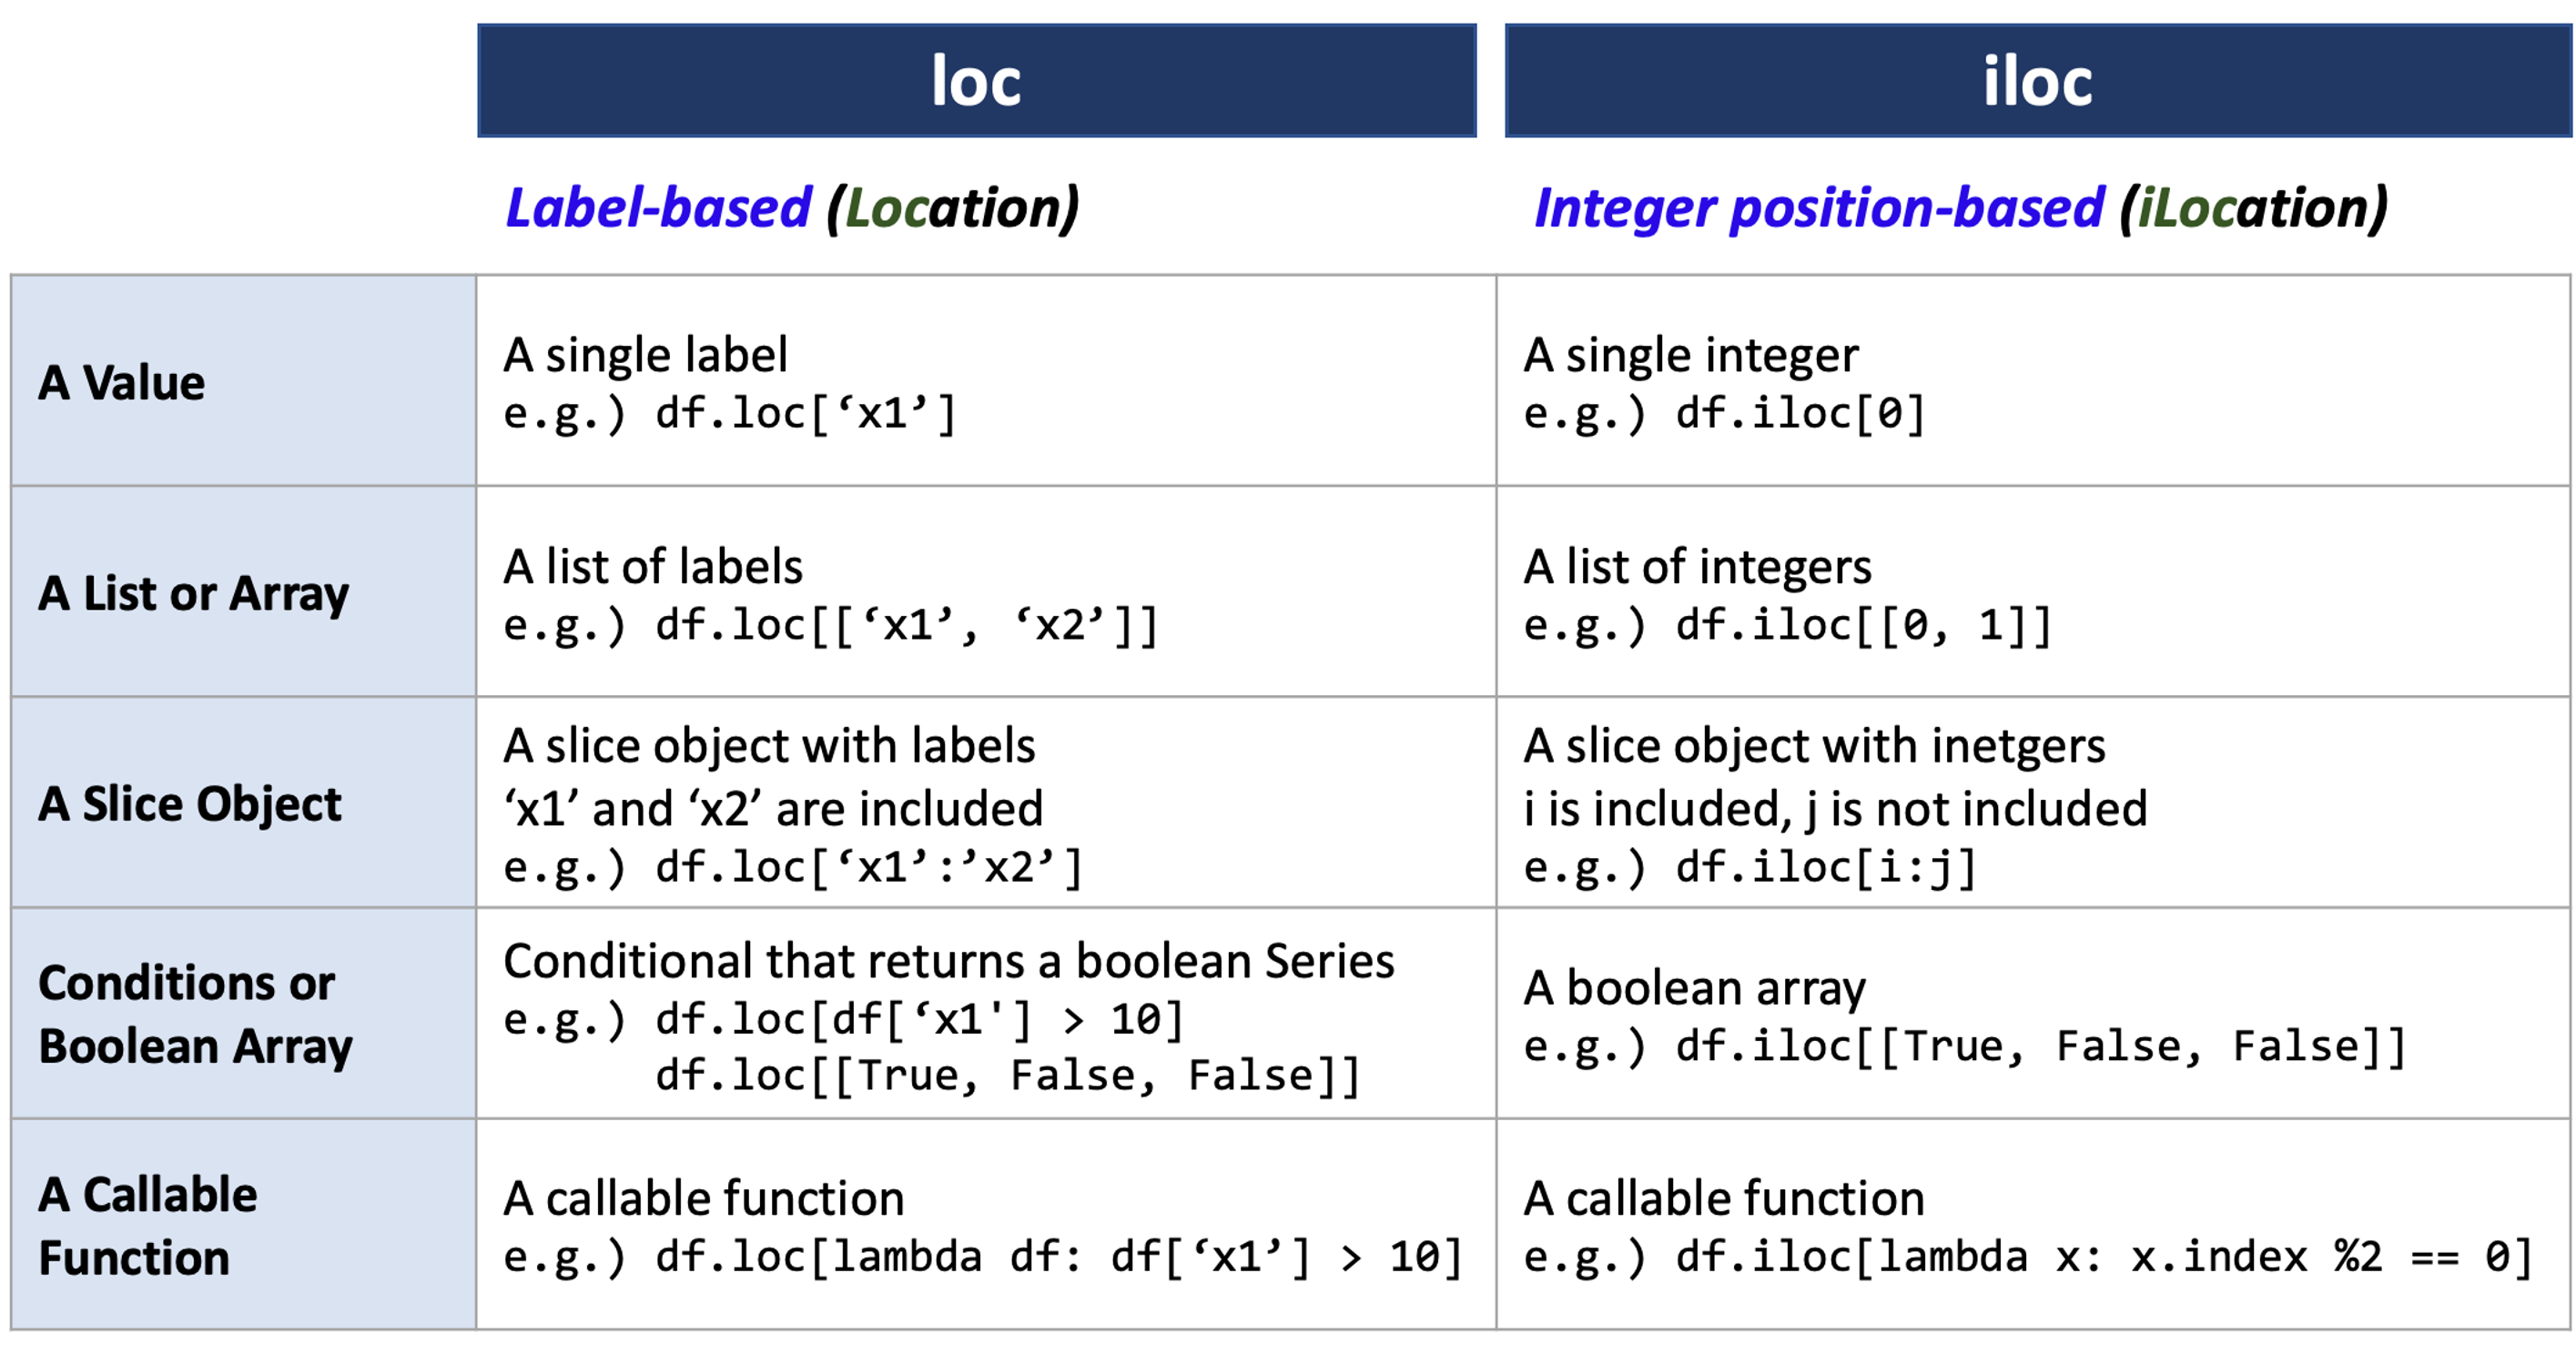

# df.sort_values

In [12]:
df.sort_values(by="Year", ascending=True)

,Company,Model,Year,Transmission,EngineSize,MPG
3,B,B1,2018,Manual,1.5,52.3
0,A,A1,2019,Manual,1.4,55.4
4,B,B2,2019,Automatic,2.0,64.2
1,A,A2,2020,Automatic,2.0,67.3
5,B,B3,2020,Automatic,1.5,68.9
2,A,A3,2021,Automatic,1.4,58.9
6,B,B4,2021,Manual,1.5,83.1
7,C,C1,2023,Automatic,1.8,70.0


In [13]:
df1 = df.sort_values(by="Year", ascending=True)
df1

,Company,Model,Year,Transmission,EngineSize,MPG
3,B,B1,2018,Manual,1.5,52.3
0,A,A1,2019,Manual,1.4,55.4
4,B,B2,2019,Automatic,2.0,64.2
1,A,A2,2020,Automatic,2.0,67.3
5,B,B3,2020,Automatic,1.5,68.9
2,A,A3,2021,Automatic,1.4,58.9
6,B,B4,2021,Manual,1.5,83.1
7,C,C1,2023,Automatic,1.8,70.0


In [14]:
df1 = df.sort_values(by=["Company","Year"], ascending=[True,False])
df1

,Company,Model,Year,Transmission,EngineSize,MPG
2,A,A3,2021,Automatic,1.4,58.9
1,A,A2,2020,Automatic,2.0,67.3
0,A,A1,2019,Manual,1.4,55.4
6,B,B4,2021,Manual,1.5,83.1
5,B,B3,2020,Automatic,1.5,68.9
4,B,B2,2019,Automatic,2.0,64.2
3,B,B1,2018,Manual,1.5,52.3
7,C,C1,2023,Automatic,1.8,70.0


# df.set_index

In [15]:
df.set_index('Model')

,Company,Year,Transmission,EngineSize,MPG
Model,,,,,
A1,A,2019,Manual,1.4,55.4
A2,A,2020,Automatic,2.0,67.3
A3,A,2021,Automatic,1.4,58.9
B1,B,2018,Manual,1.5,52.3
B2,B,2019,Automatic,2.0,64.2
B3,B,2020,Automatic,1.5,68.9
B4,B,2021,Manual,1.5,83.1
C1,C,2023,Automatic,1.8,70.0


# df.reset_index

In [16]:
df1.reset_index(drop=True)

,Company,Model,Year,Transmission,EngineSize,MPG
0,A,A3,2021,Automatic,1.4,58.9
1,A,A2,2020,Automatic,2.0,67.3
2,A,A1,2019,Manual,1.4,55.4
3,B,B4,2021,Manual,1.5,83.1
4,B,B3,2020,Automatic,1.5,68.9
5,B,B2,2019,Automatic,2.0,64.2
6,B,B1,2018,Manual,1.5,52.3
7,C,C1,2023,Automatic,1.8,70.0


# Alter column/series order

In [17]:
df

,Company,Model,Year,Transmission,EngineSize,MPG
0,A,A1,2019,Manual,1.4,55.4
1,A,A2,2020,Automatic,2.0,67.3
2,A,A3,2021,Automatic,1.4,58.9
3,B,B1,2018,Manual,1.5,52.3
4,B,B2,2019,Automatic,2.0,64.2
5,B,B3,2020,Automatic,1.5,68.9
6,B,B4,2021,Manual,1.5,83.1
7,C,C1,2023,Automatic,1.8,70.0


In [18]:
df[["MPG","EngineSize","Transmission","Company","Model","Year"]]

,MPG,EngineSize,Transmission,Company,Model,Year
0,55.4,1.4,Manual,A,A1,2019
1,67.3,2.0,Automatic,A,A2,2020
2,58.9,1.4,Automatic,A,A3,2021
3,52.3,1.5,Manual,B,B1,2018
4,64.2,2.0,Automatic,B,B2,2019
5,68.9,1.5,Automatic,B,B3,2020
6,83.1,1.5,Manual,B,B4,2021
7,70.0,1.8,Automatic,C,C1,2023


In [19]:
df.iloc[:,[5,4,3,0,1,2]]

,MPG,EngineSize,Transmission,Company,Model,Year
0,55.4,1.4,Manual,A,A1,2019
1,67.3,2.0,Automatic,A,A2,2020
2,58.9,1.4,Automatic,A,A3,2021
3,52.3,1.5,Manual,B,B1,2018
4,64.2,2.0,Automatic,B,B2,2019
5,68.9,1.5,Automatic,B,B3,2020
6,83.1,1.5,Manual,B,B4,2021
7,70.0,1.8,Automatic,C,C1,2023


# Series.unique

In [20]:
df["EngineSize"].unique()

array([1.4, 2. , 1.5, 1.8])

In [21]:
df["Company"].unique()

array(['A', 'B', 'C'], dtype=object)

In [22]:
df["Year"].unique()

array([2019, 2020, 2021, 2018, 2023], dtype=int64)

# Series.nunique

In [23]:
df["EngineSize"].nunique()

4

In [24]:
df["Year"].nunique()

5

In [25]:
df["Transmission"].nunique()

2

# pd.read_json

In [26]:
link = "https://api.data.gov.hk/v2/filter?q=%7B%22resource%22%3A%22http%3A%2F%2Fwww.rvd.gov.hk%2Fdoc%2Fen%2Fstatistics%2Fhis_data_16.xls%22%2C%22section%22%3A1%2C%22format%22%3A%22json%22%7D"
data = pd.read_json(link)


In [27]:
url= 'https://cdn.jsdelivr.net/npm/@fawazahmed0/currency-api@latest/v1/currencies/eur.json'
price = pd.read_json(url)
price.loc['hkd']

date    2024-10-09 00:00:00
eur                8.531271
Name: hkd, dtype: object

In [28]:
# change the column name
data.rename(columns = {'年':'Year','月':'Month','數目 No.':'Case',
    '總值  (百萬元) Consideration   ($ million)':'Amount_mil'}, inplace = True)

In [29]:
data

,年 Year,月 Month,一手買賣 數目 Primary Sales No.,一手買賣 總值 (百萬元) Primary Sales Consideration ($ million),二手買賣 數目 Secondary Sales No.,二手買賣 總值 (百萬元) Secondary Sales Consideration ($ million)
0,2002,1,2718,8218,5129,9966
1,2002,2,1506,4305,4189,8070
2,2002,3,1709,4190,3741,6795
3,2002,4,2543,6516,4866,8739
4,2002,5,2257,5844,5068,11097
...,...,...,...,...,...,...
261,2023,10,356,4805,1767,19693
262,2023,11,547,6318,2007,13352
263,2023,12,959,9684,1970,14640
264,2024,1,1003,8336,2474,19456


In [30]:
# join Year and Month as new column
data["DateTime"] = data['年 Year'].astype(str) + "-" + data['月 Month'].astype(str)
# drop Year and Month
data = data.drop(['年 Year','月 Month'], axis=1)
# set DateTime as index
data = data.set_index('DateTime')
data

,一手買賣 數目 Primary Sales No.,一手買賣 總值 (百萬元) Primary Sales Consideration ($ million),二手買賣 數目 Secondary Sales No.,二手買賣 總值 (百萬元) Secondary Sales Consideration ($ million)
DateTime,,,,
2002-1,2718,8218,5129,9966
2002-2,1506,4305,4189,8070
2002-3,1709,4190,3741,6795
2002-4,2543,6516,4866,8739
2002-5,2257,5844,5068,11097
...,...,...,...,...
2023-10,356,4805,1767,19693
2023-11,547,6318,2007,13352
2023-12,959,9684,1970,14640


In [31]:
import plotly.express as px
fig = px.line(data, x=data.index, y=["一手買賣 總值 (百萬元) Primary Sales Consideration ($ million)","二手買賣 總值 (百萬元) Secondary Sales Consideration ($ million)"], title='Domestic Sales')
fig.show()

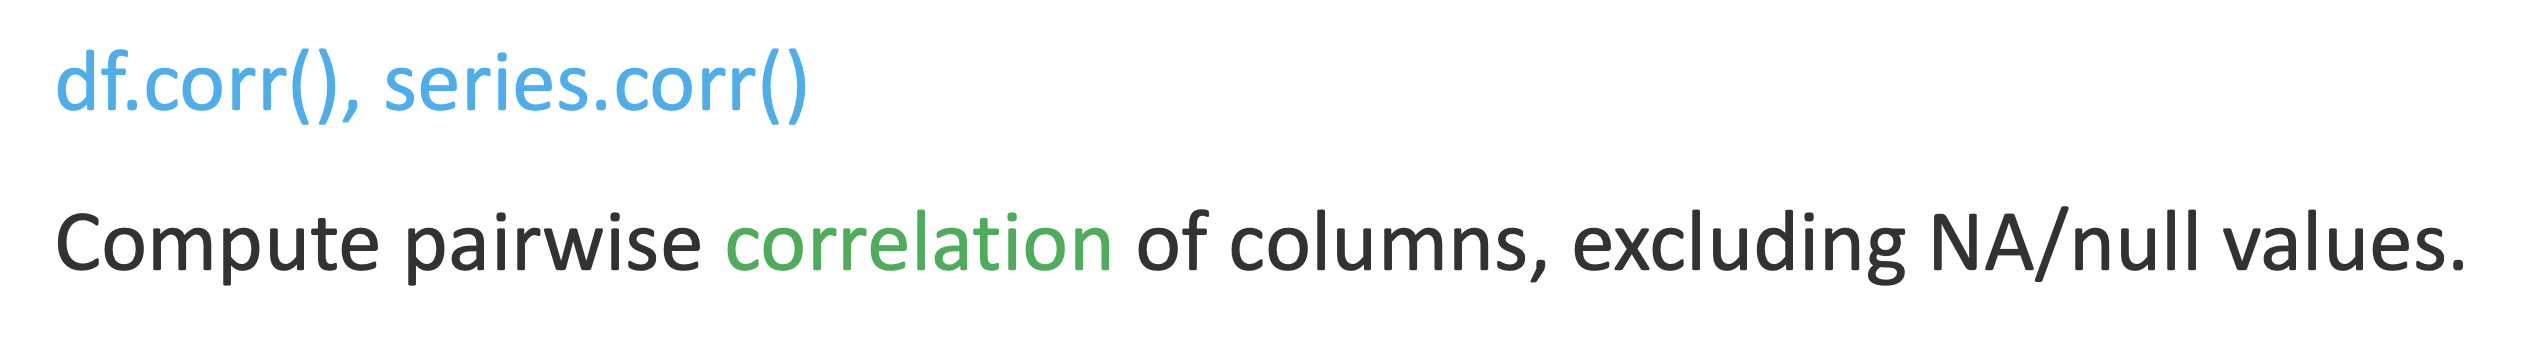

In [32]:
data.corr()

,一手買賣 數目 Primary Sales No.,一手買賣 總值 (百萬元) Primary Sales Consideration ($ million),二手買賣 數目 Secondary Sales No.,二手買賣 總值 (百萬元) Secondary Sales Consideration ($ million)
一手買賣 數目 Primary Sales No.,1.000000,0.540893,0.131269,0.046023
一手買賣 總值 (百萬元) Primary Sales Consideration ($ million),0.540893,1.000000,-0.014293,0.554104
二手買賣 數目 Secondary Sales No.,0.131269,-0.014293,1.000000,0.491342
二手買賣 總值 (百萬元) Secondary Sales Consideration ($ million),0.046023,0.554104,0.491342,1.000000


In [33]:
data["一手買賣 數目 Primary Sales No."].corr(data["一手買賣 總值 (百萬元) Primary Sales Consideration ($ million)"])

0.540893127545547

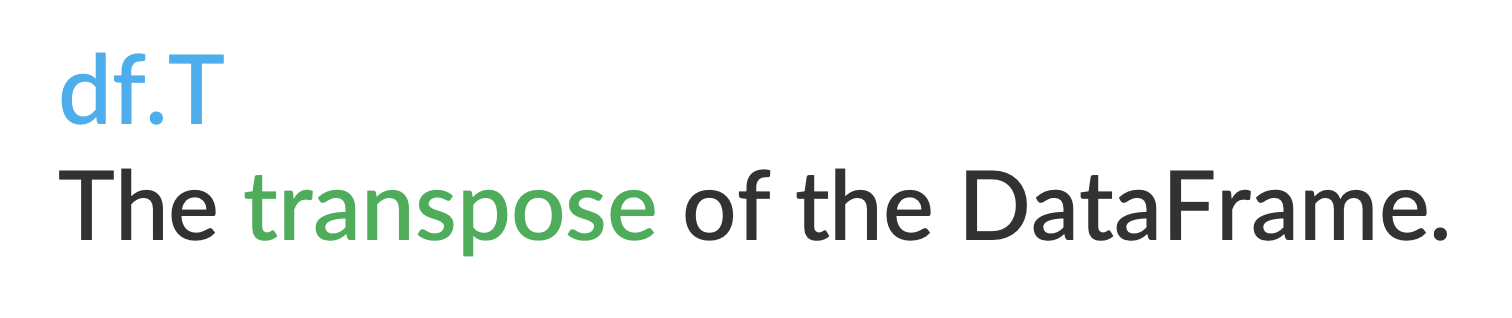

In [34]:
data.T

DateTime,2002-1,2002-2,2002-3,2002-4,2002-5,2002-6,2002-7,2002-8,2002-9,2002-10,...,2023-5,2023-6,2023-7,2023-8,2023-9,2023-10,2023-11,2023-12,2024-1,2024-2
一手買賣 數目 Primary Sales No.,2718,1506,1709,2543,2257,2087,755,796,3278,2282,...,1000,1019,810,742,964,356,547,959,1003,367
一手買賣 總值 (百萬元) Primary Sales Consideration ($ million),8218,4305,4190,6516,5844,4840,1866,2313,7005,5032,...,11807,12718,7438,8440,7663,4805,6318,9684,8336,5677
二手買賣 數目 Secondary Sales No.,5129,4189,3741,4866,5068,5108,4206,4085,3000,3581,...,3003,2594,2255,2505,1898,1767,2007,1970,2474,2008
二手買賣 總值 (百萬元) Secondary Sales Consideration ($ million),9966,8070,6795,8739,11097,11289,8406,7554,5108,6626,...,24961,20903,19153,20205,15124,19693,13352,14640,19456,13419


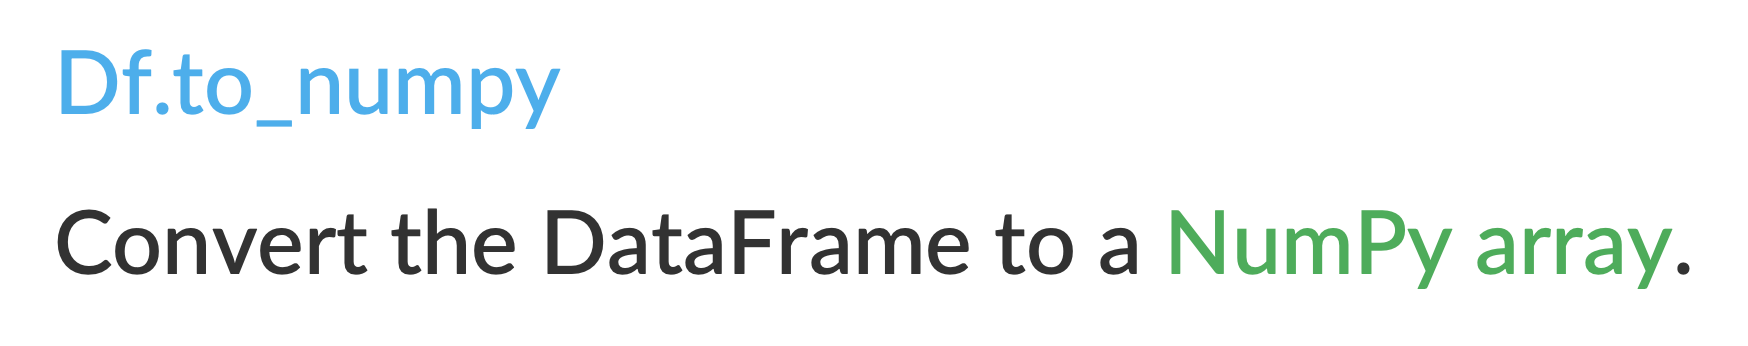

In [35]:
data.to_numpy()

array([[ 2718,  8218,  5129,  9966],
       [ 1506,  4305,  4189,  8070],
       [ 1709,  4190,  3741,  6795],
       ...,
       [  959,  9684,  1970, 14640],
       [ 1003,  8336,  2474, 19456],
       [  367,  5677,  2008, 13419]], dtype=int64)

In [36]:
data["一手買賣 數目 Primary Sales No."].to_numpy()

array([2718, 1506, 1709, 2543, 2257, 2087,  755,  796, 3278, 2282, 1340,
       1817, 2291,  966, 1655, 2431, 1257, 1602, 2765, 2766, 1867, 3958,
       2602, 2338, 2894, 3734, 3705, 1379,  961, 2100, 2421, 1099, 1558,
       1801, 2576, 1466, 1056, 2092,  993,  918, 2471, 2028, 1150,  569,
        524, 2762, 1228,  203,  148,  251,  895,  781, 1137, 1105,  552,
       1421, 3929, 1165,  953, 1649,  994, 1267,  834, 2410, 2293, 1173,
       1402, 1886, 2434, 1901, 2573,  956, 1702,  690, 2399,  540,  638,
       2058,  457,  216,  917,  403,  131,  895,  507,  232,  863, 1587,
       2525, 2717, 1307, 2301, 1532,  627,  753, 1210,  975,  564, 2028,
       1975,  685, 1318, 1137, 1531,  556, 1656,  747,  474,  296,  486,
       1123,  741, 2054, 1050,  608,  884,  231,  822, 1189, 1396,  879,
        581, 1435,  804, 1092,  827, 1670, 1397,  644, 2264, 1066,  309,
        632, 1197, 1095, 1045, 1328,  135,  211,  546,  871,  773, 1151,
       2062, 1760, 1142,  693, 1136,  841, 1375, 25

# Time Series

In [37]:
tnx = pd.read_csv("^TNX.csv")
tnx.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
7057,2022-12-26,NaN,NaN,NaN,NaN,NaN,NaN
7058,2022-12-27,3.787,3.862,3.787,3.860,3.860,0.0
7059,2022-12-28,3.818,3.890,3.815,3.887,3.887,0.0
7060,2022-12-29,3.868,3.886,3.818,3.835,3.835,0.0
7061,2022-12-30,3.869,3.905,3.831,3.879,3.879,0.0


In [38]:
tnx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7062 entries, 0 to 7061
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7062 non-null   object 
 1   Open       5780 non-null   float64
 2   High       5780 non-null   float64
 3   Low        5780 non-null   float64
 4   Close      5780 non-null   float64
 5   Adj Close  5780 non-null   float64
 6   Volume     5780 non-null   float64
dtypes: float64(6), object(1)
memory usage: 386.3+ KB


In [39]:
tnx['Date'] = pd.to_datetime(tnx['Date'],format="%Y-%m-%d")
tnx.Date

0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
7057   2022-12-26
7058   2022-12-27
7059   2022-12-28
7060   2022-12-29
7061   2022-12-30
Name: Date, Length: 7062, dtype: datetime64[ns]

In [40]:
tnx = tnx.set_index('Date')
tnx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7062 entries, 2000-01-03 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5780 non-null   float64
 1   High       5780 non-null   float64
 2   Low        5780 non-null   float64
 3   Close      5780 non-null   float64
 4   Adj Close  5780 non-null   float64
 5   Volume     5780 non-null   float64
dtypes: float64(6)
memory usage: 386.2 KB


In [41]:
tnx.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-28,3.818,3.890,3.815,3.887,3.887,0.0
2022-12-29,3.868,3.886,3.818,3.835,3.835,0.0
2022-12-30,3.869,3.905,3.831,3.879,3.879,0.0


In [42]:
df_dt = pd.DataFrame({'year': [2023, 2023],
                   'month': [1, 1],
                   'day': [1, 2],
                   'sales': [3750, 3900]})
df_dt

,year,month,day,sales
0,2023,1,1,3750
1,2023,1,2,3900


In [43]:
df_dt['date'] = pd.to_datetime(df_dt[['year','month','day']])
df_dt = df_dt.drop(['year','month','day'], axis=1)
df_dt = df_dt.set_index('date')
df_dt

,sales
date,
2023-01-01,3750
2023-01-02,3900


In [44]:
df_dt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2 entries, 2023-01-01 to 2023-01-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sales   2 non-null      int64
dtypes: int64(1)
memory usage: 32.0 bytes


In [45]:
pd.to_datetime(1681038343, unit='s')

Timestamp('2023-04-09 11:05:43')

In [46]:
pd.to_datetime(1681038343433502912, unit='ns')

Timestamp('2023-04-09 11:05:43.433502912')

# Categorical data

In [47]:
animal = pd.Series(["Bird","Cat", "Dog","Elephant"], dtype="category")

In [48]:
animal.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4 entries, 0 to 3
Series name: None
Non-Null Count  Dtype   
--------------  -----   
4 non-null      category
dtypes: category(1)
memory usage: 336.0 bytes


In [49]:
import numpy as np
df_exam = pd.DataFrame({'Score': np.random.randint(1, 101, size=40)})

In [50]:
df_exam.head(6)

,Score
0,65
1,52
2,8
3,76
4,51
5,3


In [51]:
df_exam['Result'] = pd.Series(np.where(df_exam['Score']>70, 'Distiction',
                         np.where(df_exam['Score']>50, 'Pass', 'Fail')
                    )).astype('category')

In [52]:
df_exam.sample(5)

,Score,Result
36,32,Fail
14,30,Fail
6,59,Pass
3,76,Distiction
25,77,Distiction


In [53]:
df_exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Score   40 non-null     int32   
 1   Result  40 non-null     category
dtypes: category(1), int32(1)
memory usage: 460.0 bytes
